In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('Exp1DL').sheet1

In [2]:
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'Input':'float'})
df = df.astype({'Output':'float'})
df.head()

,Input,Output
0,1.0,14.0
1,2.0,21.0
2,3.0,28.0
3,4.0,35.0
4,5.0,42.0


In [3]:
X=df[['Input']].values
y=df[['Output']].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=33)

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
Scaler=MinMaxScaler()

In [8]:
Scaler.fit(X_train)

MinMaxScaler()

In [9]:
X_train1=Scaler.transform(X_train)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
ai_brain=Sequential([
    Dense(9,activation='relu'),
    Dense(11,activation='relu'),

    Dense(1)
])

In [11]:
ai_brain.compile(
    optimizer = 'rmsprop',
    loss = 'mse'
)

ai_brain.fit(X_train1,y_train,epochs = 3000)

Streaming output truncated to the last 5000 lines.
Epoch 233/3000
3/3 [==============================] - 0s 4ms/step - loss: 143006.9531
Epoch 234/3000
3/3 [==============================] - 0s 4ms/step - loss: 142911.8281
Epoch 235/3000
3/3 [==============================] - 0s 4ms/step - loss: 142822.5000
Epoch 236/3000
3/3 [==============================] - 0s 5ms/step - loss: 142735.0469
Epoch 237/3000
3/3 [==============================] - 0s 5ms/step - loss: 142630.7344
Epoch 238/3000
3/3 [==============================] - 0s 4ms/step - loss: 142525.4844
Epoch 239/3000
3/3 [==============================] - 0s 5ms/step - loss: 142424.4375
Epoch 240/3000
3/3 [==============================] - 0s 4ms/step - loss: 142337.7812
Epoch 241/3000
3/3 [==============================] - 0s 4ms/step - loss: 142242.3125
Epoch 242/3000
3/3 [==============================] - 0s 5ms/step - loss: 142145.8281
Epoch 243/3000
3/3 [==============================] - 0s 5ms/step - loss: 142060.8281
Epo

<Axes: >

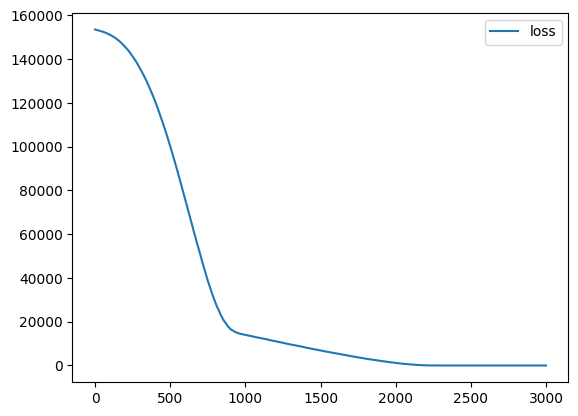

In [12]:
loss_df = pd.DataFrame(ai_brain.history.history)

loss_df.plot()

In [13]:
ai_brain.evaluate(X_test,y_test)

X_n1 = [[101]]

X_n1_1 = Scaler.transform(X_n1)

ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 88ms/step


array([[714.15015]], dtype=float32)